In [191]:
import pandas as pd
import numpy as np

In [192]:
import torch
import random
import torch.backends.cudnn as cudnn
import numpy as np
import os
seed= 0
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)  # type: ignore
torch.backends.cudnn.deterministic = True  # type: ignore
torch.backends.cudnn.benchmark = False  # type: ignore

In [193]:
train_1=pd.read_csv(r'C:\Users\yuntaeyang\Desktop\w_train_2_group.csv')

In [194]:
test_1=pd.read_csv(r'C:\Users\yuntaeyang\Desktop\w_test_2_group.csv')

In [195]:
train_1['TPTP'] = train_1['TPGRP_TPCD'].astype(str)  + train_1['PRDN_FOM_C'].astype(str) 

In [196]:
train_1['target_1'] = train_1['target']
train_1=train_1.drop(['date', 'umd', 'target', 'variable'], axis=1)

In [197]:
train_1_array=np.array(train_1)

In [198]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_1_array[:, 86]=le.fit_transform(train_1_array[:,86])

In [199]:
train_1_array[:, 6]=le.fit_transform(train_1_array[:, 6])

In [200]:
train_1= pd.DataFrame(train_1_array, columns=train_1.columns)

In [201]:
train_1=train_1.astype(float)

In [202]:
test_1['TPTP'] = test_1['TPGRP_TPCD'].astype(str)  + test_1['PRDN_FOM_C'].astype(str) 

In [203]:
test_1=test_1.sort_values(by=['index'])

In [204]:
test_id_1=test_1[['index', 'date', 'umd']]

In [205]:
test_1=test_1.drop(['index', 'date', 'umd'], axis=1)
test_1_array=np.array(test_1)

In [206]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_1_array[:, 86]=le.fit_transform(test_1_array[:,86])

In [207]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_1_array[:, 6]=le.fit_transform(test_1_array[:,6])

In [208]:
test_1= pd.DataFrame(test_1_array, columns=test_1.columns)

In [209]:
test_1=test_1.astype(float)

In [210]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [212]:

isol = IsolationForest(max_samples=100, random_state=200) 


isol.fit(X_features)
y_pred= isol.predict(X_features)

In [213]:
isola=pd.DataFrame(y_pred, columns= ['isal'])

In [214]:
train_1=train_1.join(isola, how='inner')

In [215]:
train_1=train_1[train_1['isal']== 1]

In [216]:
train_1=train_1.drop(['isal'], axis=1)

In [217]:
X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

In [218]:

isol = IsolationForest(max_samples=100, random_state=200) 

isol.fit(X_features)
y_pred= isol.predict(X_features)

In [219]:
isola=pd.DataFrame(y_pred, columns= ['isal'])

In [220]:
train_1=train_1.join(isola, how='inner')

In [221]:
train_1=train_1[train_1['isal']== 1]

In [222]:
train_1=train_1.drop(['isal'], axis=1)

In [223]:
X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

In [224]:
# shuffle1
import sklearn
x_shuffled = sklearn.utils.shuffle(X_features, random_state=3217)
y_shuffled =sklearn.utils.shuffle(y_label, random_state=3217)
X_train, X_test, y_train, y_test=train_test_split(x_shuffled, y_shuffled, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train.shape, X_test.shape)

(2508, 87) (1075, 87)


In [225]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled1, y_resampled1 = smote_nc.fit_resample(X_train, y_train)

In [226]:
X_train1 = np.array(X_resampled1)
y_train1 = np.array(y_resampled1).squeeze()
X_test  = np.array(X_test)
y_test  = np.array(y_test).squeeze()

In [227]:
# shuffle2
x_shuffled2 = sklearn.utils.shuffle(X_features, random_state=3067)
y_shuffled2 =sklearn.utils.shuffle(y_label, random_state=3067)
X_train2, X_test2, y_train2, y_test2=train_test_split(x_shuffled2, y_shuffled2, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train2.shape, X_test2.shape)

(2508, 87) (1075, 87)


In [228]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled2, y_resampled2 = smote_nc.fit_resample(X_train2, y_train2)

In [229]:
X_train2 = np.array(X_resampled2)
y_train2 = np.array(y_resampled2).squeeze()
X_test2  = np.array(X_test2)
y_test2  = np.array(y_test2).squeeze()

In [230]:
# shuffle3
x_shuffled3 = sklearn.utils.shuffle(X_features, random_state=3415)
y_shuffled3 =sklearn.utils.shuffle(y_label, random_state=3415)
X_train3, X_test3, y_train3, y_test3=train_test_split(x_shuffled3, y_shuffled3, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train3.shape, X_test3.shape)

(2508, 87) (1075, 87)


In [231]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled3, y_resampled3 = smote_nc.fit_resample(X_train3, y_train3)

In [232]:
X_train3 = np.array(X_resampled3)
y_train3 = np.array(y_resampled3).squeeze()
X_test3  = np.array(X_test3)
y_test3  = np.array(y_test3).squeeze()

In [233]:
# shuffle4
x_shuffled4 = sklearn.utils.shuffle(X_features, random_state=3563)
y_shuffled4 =sklearn.utils.shuffle(y_label, random_state=3563)
X_train4, X_test4, y_train4, y_test4=train_test_split(x_shuffled4, y_shuffled4, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train4.shape, X_test4.shape)

(2508, 87) (1075, 87)


In [234]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled4, y_resampled4 = smote_nc.fit_resample(X_train4, y_train4)

In [235]:
X_train4 = np.array(X_resampled4)
y_train4 = np.array(y_resampled4).squeeze()
X_test4  = np.array(X_test4)
y_test4  = np.array(y_test4).squeeze()

In [236]:
# shuffle5
x_shuffled5 = sklearn.utils.shuffle(X_features, random_state=3528)
y_shuffled5 =sklearn.utils.shuffle(y_label, random_state=3528)
X_train5, X_test5, y_train5, y_test5=train_test_split(x_shuffled5, y_shuffled5, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train5.shape, X_test5.shape)

(2508, 87) (1075, 87)


In [237]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled5, y_resampled5 = smote_nc.fit_resample(X_train5, y_train5)

In [238]:
X_train5 = np.array(X_resampled5)
y_train5 = np.array(y_resampled5).squeeze()
X_test5  = np.array(X_test5)
y_test5  = np.array(y_test5).squeeze()

In [239]:
# shuffle6
x_shuffled6 = sklearn.utils.shuffle(X_features, random_state=3006)
y_shuffled6 =sklearn.utils.shuffle(y_label, random_state=3006)
X_train6, X_test6, y_train6, y_test6=train_test_split(x_shuffled6, y_shuffled6, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train6.shape, X_test6.shape)

(2508, 87) (1075, 87)


In [240]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled6, y_resampled6 = smote_nc.fit_resample(X_train6, y_train6)

In [241]:
X_train6 = np.array(X_resampled6)
y_train6 = np.array(y_resampled6).squeeze()
X_test6  = np.array(X_test6)
y_test6  = np.array(y_test6).squeeze()

In [242]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [243]:
import torch

In [244]:
# model1
clf1 = TabNetClassifier(seed=0)
clf1.fit(
    X_train1, y_train1,
    eval_set=[(X_test, y_test)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.71049 | val_0_auc: 0.44785 |  0:00:01s
epoch 1  | loss: 0.60013 | val_0_auc: 0.40241 |  0:00:02s
epoch 2  | loss: 0.53853 | val_0_auc: 0.49046 |  0:00:03s
epoch 3  | loss: 0.47925 | val_0_auc: 0.53797 |  0:00:05s
epoch 4  | loss: 0.43384 | val_0_auc: 0.47581 |  0:00:06s
epoch 5  | loss: 0.38738 | val_0_auc: 0.57803 |  0:00:08s
epoch 6  | loss: 0.34621 | val_0_auc: 0.52741 |  0:00:09s
epoch 7  | loss: 0.31277 | val_0_auc: 0.57858 |  0:00:10s
epoch 8  | loss: 0.30197 | val_0_auc: 0.60474 |  0:00:12s
epoch 9  | loss: 0.27295 | val_0_auc: 0.54851 |  0:00:13s
epoch 10 | loss: 0.2616  | val_0_auc: 0.4995  |  0:00:14s
epoch 11 | loss: 0.25997 | val_0_auc: 0.54805 |  0:00:16s
epoch 12 | loss: 0.2484  | val_0_auc: 0.56756 |  0:00:17s
epoch 13 | loss: 0.23538 | val_0_auc: 0.57873 |  0:00:19s
epoch 14 | loss: 0.23743 | val_0_auc: 0.58793 |  0:00:20s
epoch 15 | loss: 0.23753 | val_0_auc: 0.55879 |  0:00:22s
epoch 16 | loss: 0.22454 | val_0_auc: 0.50066 |  0:00:

In [245]:
# model2
clf2 = TabNetClassifier(seed=0)
clf2.fit(
    X_train2, y_train2,
    eval_set=[(X_test2, y_test2)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.72721 | val_0_auc: 0.46637 |  0:00:01s
epoch 1  | loss: 0.63025 | val_0_auc: 0.49543 |  0:00:02s
epoch 2  | loss: 0.5727  | val_0_auc: 0.43156 |  0:00:05s
epoch 3  | loss: 0.51702 | val_0_auc: 0.48853 |  0:00:07s
epoch 4  | loss: 0.48909 | val_0_auc: 0.47259 |  0:00:10s
epoch 5  | loss: 0.46136 | val_0_auc: 0.55153 |  0:00:13s
epoch 6  | loss: 0.4206  | val_0_auc: 0.59338 |  0:00:14s
epoch 7  | loss: 0.3813  | val_0_auc: 0.62299 |  0:00:16s
epoch 8  | loss: 0.36546 | val_0_auc: 0.58416 |  0:00:17s
epoch 9  | loss: 0.33091 | val_0_auc: 0.47374 |  0:00:19s
epoch 10 | loss: 0.32608 | val_0_auc: 0.50255 |  0:00:20s
epoch 11 | loss: 0.29625 | val_0_auc: 0.50947 |  0:00:22s
epoch 12 | loss: 0.28042 | val_0_auc: 0.49037 |  0:00:23s
epoch 13 | loss: 0.25916 | val_0_auc: 0.50276 |  0:00:25s
epoch 14 | loss: 0.24829 | val_0_auc: 0.40732 |  0:00:26s
epoch 15 | loss: 0.23721 | val_0_auc: 0.42108 |  0:00:27s
epoch 16 | loss: 0.23476 | val_0_auc: 0.4117  |  0:00:

In [246]:
# model3
clf3 = TabNetClassifier(seed=0)
clf3.fit(
    X_train3, y_train3,
    eval_set=[(X_test3, y_test3)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.73927 | val_0_auc: 0.52717 |  0:00:01s
epoch 1  | loss: 0.61234 | val_0_auc: 0.48641 |  0:00:02s
epoch 2  | loss: 0.55864 | val_0_auc: 0.43338 |  0:00:03s
epoch 3  | loss: 0.5128  | val_0_auc: 0.58611 |  0:00:05s
epoch 4  | loss: 0.46424 | val_0_auc: 0.45455 |  0:00:06s
epoch 5  | loss: 0.41539 | val_0_auc: 0.56806 |  0:00:07s
epoch 6  | loss: 0.38244 | val_0_auc: 0.51106 |  0:00:08s
epoch 7  | loss: 0.33634 | val_0_auc: 0.4969  |  0:00:10s
epoch 8  | loss: 0.31947 | val_0_auc: 0.45383 |  0:00:11s
epoch 9  | loss: 0.30327 | val_0_auc: 0.51095 |  0:00:12s
epoch 10 | loss: 0.28186 | val_0_auc: 0.59033 |  0:00:13s
epoch 11 | loss: 0.2675  | val_0_auc: 0.58333 |  0:00:15s
epoch 12 | loss: 0.24573 | val_0_auc: 0.59276 |  0:00:16s
epoch 13 | loss: 0.23889 | val_0_auc: 0.55179 |  0:00:17s
epoch 14 | loss: 0.22554 | val_0_auc: 0.56852 |  0:00:18s
epoch 15 | loss: 0.21783 | val_0_auc: 0.56018 |  0:00:19s
epoch 16 | loss: 0.21734 | val_0_auc: 0.59584 |  0:00:

epoch 141| loss: 0.06313 | val_0_auc: 0.85893 |  0:03:08s
epoch 142| loss: 0.06228 | val_0_auc: 0.87406 |  0:03:10s
epoch 143| loss: 0.05741 | val_0_auc: 0.87927 |  0:03:11s
epoch 144| loss: 0.05472 | val_0_auc: 0.88635 |  0:03:12s
epoch 145| loss: 0.04891 | val_0_auc: 0.88299 |  0:03:13s
epoch 146| loss: 0.04012 | val_0_auc: 0.88671 |  0:03:15s
epoch 147| loss: 0.04969 | val_0_auc: 0.88869 |  0:03:16s
epoch 148| loss: 0.05747 | val_0_auc: 0.89433 |  0:03:18s
epoch 149| loss: 0.04619 | val_0_auc: 0.88989 |  0:03:20s
epoch 150| loss: 0.04933 | val_0_auc: 0.88606 |  0:03:21s
epoch 151| loss: 0.0513  | val_0_auc: 0.88684 |  0:03:23s
epoch 152| loss: 0.04692 | val_0_auc: 0.88889 |  0:03:25s
epoch 153| loss: 0.04202 | val_0_auc: 0.89361 |  0:03:26s
epoch 154| loss: 0.03558 | val_0_auc: 0.88434 |  0:03:27s
epoch 155| loss: 0.03527 | val_0_auc: 0.87759 |  0:03:28s
epoch 156| loss: 0.03604 | val_0_auc: 0.88112 |  0:03:29s
epoch 157| loss: 0.03475 | val_0_auc: 0.88438 |  0:03:31s
epoch 158| los

In [247]:
# model4
clf4 = TabNetClassifier(seed=0)
clf4.fit(
    X_train4, y_train4,
    eval_set=[(X_test4, y_test4)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.7176  | val_0_auc: 0.51063 |  0:00:01s
epoch 1  | loss: 0.62207 | val_0_auc: 0.5481  |  0:00:02s
epoch 2  | loss: 0.56354 | val_0_auc: 0.52947 |  0:00:03s
epoch 3  | loss: 0.52984 | val_0_auc: 0.55199 |  0:00:04s
epoch 4  | loss: 0.47258 | val_0_auc: 0.56428 |  0:00:06s
epoch 5  | loss: 0.41986 | val_0_auc: 0.53439 |  0:00:07s
epoch 6  | loss: 0.38393 | val_0_auc: 0.52498 |  0:00:08s
epoch 7  | loss: 0.36102 | val_0_auc: 0.55382 |  0:00:09s
epoch 8  | loss: 0.34431 | val_0_auc: 0.59897 |  0:00:10s
epoch 9  | loss: 0.33555 | val_0_auc: 0.61647 |  0:00:12s
epoch 10 | loss: 0.29536 | val_0_auc: 0.4975  |  0:00:13s
epoch 11 | loss: 0.28722 | val_0_auc: 0.53194 |  0:00:14s
epoch 12 | loss: 0.26388 | val_0_auc: 0.57933 |  0:00:16s
epoch 13 | loss: 0.24757 | val_0_auc: 0.52883 |  0:00:18s
epoch 14 | loss: 0.2295  | val_0_auc: 0.4801  |  0:00:19s
epoch 15 | loss: 0.23708 | val_0_auc: 0.45827 |  0:00:21s
epoch 16 | loss: 0.22371 | val_0_auc: 0.54502 |  0:00:

In [248]:
# model5
clf5 = TabNetClassifier(seed=0)
clf5.fit(
    X_train5, y_train5,
    eval_set=[(X_test5, y_test5)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.72059 | val_0_auc: 0.40314 |  0:00:01s
epoch 1  | loss: 0.61569 | val_0_auc: 0.45831 |  0:00:02s
epoch 2  | loss: 0.56501 | val_0_auc: 0.51568 |  0:00:03s
epoch 3  | loss: 0.51023 | val_0_auc: 0.44621 |  0:00:05s
epoch 4  | loss: 0.46149 | val_0_auc: 0.52746 |  0:00:06s
epoch 5  | loss: 0.41446 | val_0_auc: 0.54035 |  0:00:07s
epoch 6  | loss: 0.38268 | val_0_auc: 0.58474 |  0:00:08s
epoch 7  | loss: 0.33303 | val_0_auc: 0.56645 |  0:00:10s
epoch 8  | loss: 0.31767 | val_0_auc: 0.61511 |  0:00:11s
epoch 9  | loss: 0.29137 | val_0_auc: 0.61187 |  0:00:13s
epoch 10 | loss: 0.27776 | val_0_auc: 0.62776 |  0:00:14s
epoch 11 | loss: 0.26082 | val_0_auc: 0.59997 |  0:00:16s
epoch 12 | loss: 0.23349 | val_0_auc: 0.56212 |  0:00:17s
epoch 13 | loss: 0.2304  | val_0_auc: 0.58297 |  0:00:18s
epoch 14 | loss: 0.21381 | val_0_auc: 0.60199 |  0:00:20s
epoch 15 | loss: 0.21215 | val_0_auc: 0.57054 |  0:00:21s
epoch 16 | loss: 0.20077 | val_0_auc: 0.57552 |  0:00:

In [249]:
# model6
clf6 = TabNetClassifier(seed=0)
clf6.fit(
    X_train6, y_train6,
    eval_set=[(X_test6, y_test6)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.69511 | val_0_auc: 0.51846 |  0:00:01s
epoch 1  | loss: 0.63529 | val_0_auc: 0.46269 |  0:00:02s
epoch 2  | loss: 0.60761 | val_0_auc: 0.37246 |  0:00:04s
epoch 3  | loss: 0.56871 | val_0_auc: 0.49427 |  0:00:05s
epoch 4  | loss: 0.53674 | val_0_auc: 0.58188 |  0:00:06s
epoch 5  | loss: 0.48777 | val_0_auc: 0.5407  |  0:00:08s
epoch 6  | loss: 0.42885 | val_0_auc: 0.46791 |  0:00:09s
epoch 7  | loss: 0.40201 | val_0_auc: 0.55265 |  0:00:10s
epoch 8  | loss: 0.39611 | val_0_auc: 0.59279 |  0:00:12s
epoch 9  | loss: 0.35669 | val_0_auc: 0.53878 |  0:00:13s
epoch 10 | loss: 0.3526  | val_0_auc: 0.47419 |  0:00:14s
epoch 11 | loss: 0.33808 | val_0_auc: 0.48044 |  0:00:16s
epoch 12 | loss: 0.31225 | val_0_auc: 0.45906 |  0:00:17s
epoch 13 | loss: 0.30008 | val_0_auc: 0.47227 |  0:00:18s
epoch 14 | loss: 0.29154 | val_0_auc: 0.50101 |  0:00:20s
epoch 15 | loss: 0.28275 | val_0_auc: 0.49276 |  0:00:22s
epoch 16 | loss: 0.27549 | val_0_auc: 0.5369  |  0:00:

In [250]:
test_1 = np.array(test_1)

In [251]:
predictions1 = clf1.predict_proba(test_1)[:,1]

In [252]:
predictions2 = clf2.predict_proba(test_1)[:,1]

In [253]:
predictions3 = clf3.predict_proba(test_1)[:,1]

In [254]:
predictions4 = clf4.predict_proba(test_1)[:,1]

In [255]:
predictions5 = clf5.predict_proba(test_1)[:,1]

In [256]:
predictions6 = clf6.predict_proba(test_1)[:,1]

In [257]:
preds1 = [ 1 if x > 0.5 else 0 for x in predictions1 ]

In [258]:
preds2 = [ 1 if x > 0.78 else 0 for x in predictions2 ]

In [259]:
preds3 = [ 1 if x > 0.51 else 0 for x in predictions3 ]

In [260]:
preds4 = [ 1 if x > 0.514 else 0 for x in predictions4 ]

In [261]:
preds5 = [ 1 if x > 0.5 else 0 for x in predictions5 ]

In [262]:
preds6 = [ 1 if x > 0.5 else 0 for x in predictions6 ]

In [263]:
tab_pred1=pd.DataFrame(preds1, columns= ['col1'])
tab_pred2=pd.DataFrame(preds2, columns= ['col2'])
tab_pred3=pd.DataFrame(preds3, columns= ['col3'])
tab_pred4=pd.DataFrame(preds4, columns= ['col4'])
tab_pred5=pd.DataFrame(preds5, columns= ['col5'])
tab_pred6=pd.DataFrame(preds6, columns= ['col6'])

In [264]:
tab_pred1['col1'].value_counts()

0    3164
1     246
Name: col1, dtype: int64

In [265]:
tab_pred2['col2'].value_counts()

0    3125
1     285
Name: col2, dtype: int64

In [266]:
tab_pred3['col3'].value_counts()

0    3214
1     196
Name: col3, dtype: int64

In [267]:
tab_pred4['col4'].value_counts()

0    3106
1     304
Name: col4, dtype: int64

In [268]:
tab_pred5['col5'].value_counts()

0    3264
1     146
Name: col5, dtype: int64

In [269]:
tab_pred6['col6'].value_counts()

0    3287
1     123
Name: col6, dtype: int64

In [270]:
tab_pred=tab_pred1.join(tab_pred2, how= 'inner')
tab_pred=tab_pred.join(tab_pred3, how= 'inner')
tab_pred=tab_pred.join(tab_pred4, how= 'inner')
tab_pred=tab_pred.join(tab_pred5, how= 'inner')
tab_pred=tab_pred.join(tab_pred6, how= 'inner')
tab_pred['sum']=(1.1*tab_pred['col1'])+(0.9*tab_pred['col2'])+(0.9*tab_pred['col3'])+(0.9*tab_pred['col4'])+(0.9*tab_pred['col5'])+(0.9*tab_pred['col6'])

In [271]:
tab_pred['2day_yn'] = np.where((tab_pred['sum']>=2), 1,0)

In [272]:
tab_pred['2day_yn'].value_counts()

0    3247
1     163
Name: 2day_yn, dtype: int64

In [273]:
sub_2=test_id_1.join(tab_pred, how= 'inner')

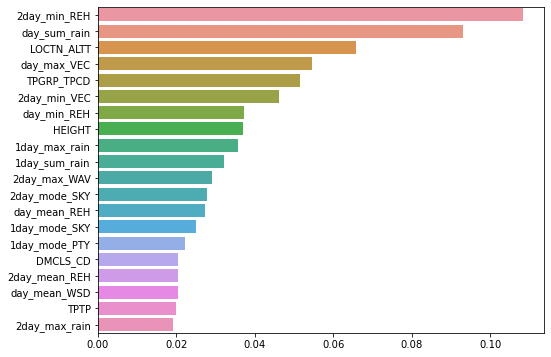

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importance_values = clf1.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled1.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

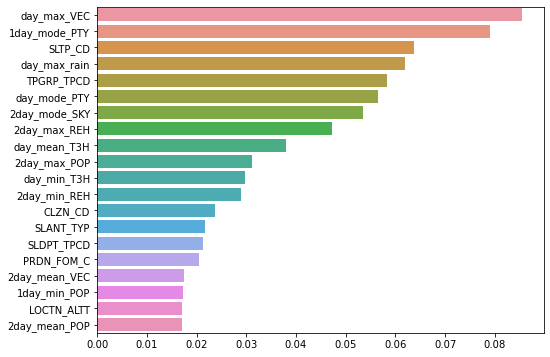

In [275]:
ftr_importance_values = clf2.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled2.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

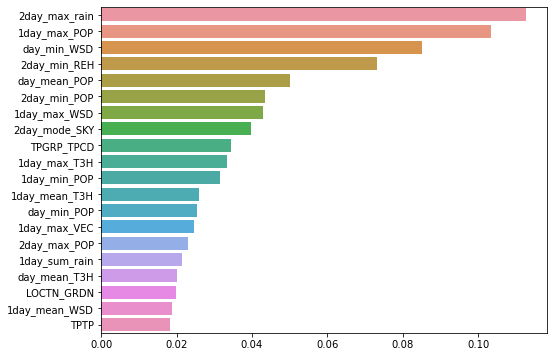

In [276]:
ftr_importance_values = clf3.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled3.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

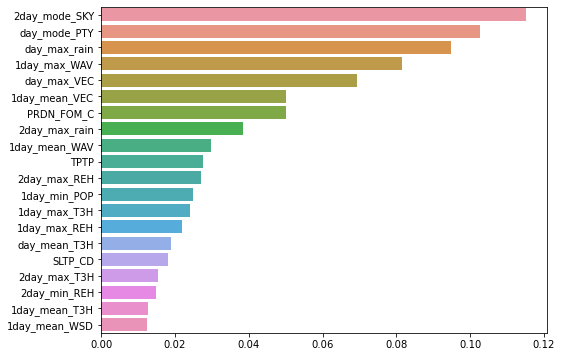

In [278]:
ftr_importance_values = clf4.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled4.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

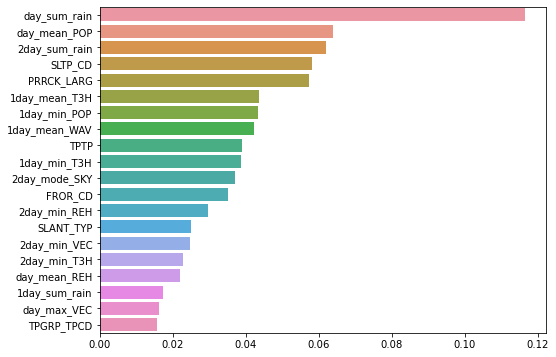

In [279]:
ftr_importance_values = clf5.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled5.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

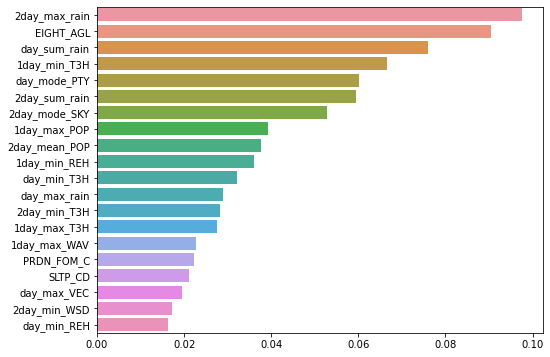

In [280]:
ftr_importance_values = clf6.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled6.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

In [277]:
sub_2.to_csv('tab_102.csv', index=False, encoding='CP949')